In [199]:
from sklearn.datasets import load_digits

In [200]:
digits, target = load_digits(return_X_y=True)
type(digits)

numpy.ndarray

In [201]:
digits_square = digits.reshape(-1, 8, 8)

In [202]:
import matplotlib.pyplot as plt

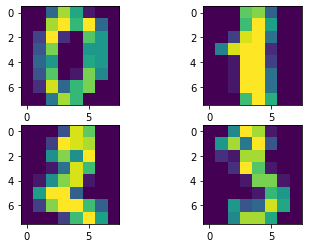

In [203]:

plt.figure()

plt.subplot(2,2,1)
plt.imshow(digits_square[0])

plt.subplot(2,2,2)
plt.imshow(digits_square[1])

plt.subplot(2,2,3)
plt.imshow(digits_square[2])

plt.subplot(2,2,4)
plt.imshow(digits_square[3])

plt.show()

In [204]:
import random
import numpy as np

[[ 0.  0.  0. ... 16.  2.  0.]
 [ 0.  0.  7. ... 16. 16.  6.]
 [ 0.  0.  0. ...  6.  0.  0.]
 ...
 [ 0.  0.  7. ...  0.  0.  0.]
 [ 0.  0.  1. ... 13.  1.  0.]
 [ 0.  0.  9. ...  8.  1.  0.]]
[8 2 2 8 8 2 8 8 2 2 8 2 2 8 2 8 8 2 8 8 2 2 8 8 2 2 8 8 2 2 8 2 8 8 2 8 8
 8 2 8 8 2 2 2 2 8 2 2 8 8 8 2 8 8 2 2 2 2 8 2 8 2 2 8 8 8 8 2 2 8 8 2 8 8
 8 2 2 2 2 8 2 8 2 2 8 8 8 8 2 8 8 8 8 2 2 8 2 8 2 8 8 8 2]


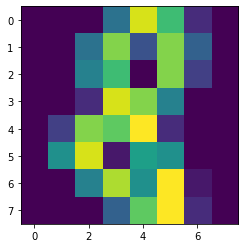

In [205]:
def generate_random_indices(percentage, class1, class2):
    indices_of_class1 = np.nonzero(target == class1)[0]
    indices_of_class2 = np.nonzero(target == class2)[0]

    min_length = min(len(indices_of_class1), len(indices_of_class2)) - 1

    indices_of_class = np.concatenate((indices_of_class1[:min_length], indices_of_class2[:min_length]))

    return random.sample(indices_of_class.tolist(),k=int(len(indices_of_class)*percentage))

def get_random_data(class1, class2):
    indices = generate_random_indices(0.3, class1, class2)
    return digits[indices,:], target[indices]

digits_sample, target_sample = get_random_data(2,8)
print(digits_sample)
print(target_sample)
plt.imshow(digits_sample.reshape((-1, 8, 8))[0])

In [206]:
#Esta es la matriz base con esto tengo una idea de como tiene que ser el zero para que me lo identifique al compararlo 
#con otro numero
zeroM=[
    [0,0,0,16,16,0,0,0], [0,16,16,16,16,16,0,0], [0,16,16,0,0,16,16,0], [0,16,16,0,0,16,16,0],  [0,16,16,0,0,16,16,0],
    [0,16,16,0,0,16,16,0], [0,0,16,0,0,16,0,0], [0,0,16,16,16,16,0,0]
]

#Esta es la matriz base con esto tengo una idea de como tiene que ser el uno para que me lo identifique al compararlo 
#con otro numero
oneM=[ [0,0,0,16,16,16,0,0], [0,0,16,16,16,16,0,0], [0,16,16,16,16,16,0,0], [0,0,0,16,16,16,0,0], [0,0,0,16,16,16,0,0],
    [0,0,0,16,16,16,0,0], [0,0,0,16,16,16,0,0], [0,0,16,16,16,16,16,0] ]

In [207]:
#Con este metodo "limpio" los campos que no son blancos pero los puedo tomar como tal para mi posterior comparación
#con la matriz modelo, el zero es un valor que defino, en mi caso mas adelante como que desde 8 ya lo puedo considerar
#como un blanco.
def norm(matriz,zero):
    norm= np.zeros((8,8))
    for f in range(len(matriz)):
        for c in range(len(matriz[f])):
            if (matriz[f][c]>= zero):
                norm[f][c]=16
            else:
                norm[f][c]=0
    return norm

In [208]:
#Este metodo es el encargado de dar la predición(comparación) entre la matriz normalizada y la matriz base.
def predict(norm,base):
    i=0
    for f in range(len(norm)):
        for c in range(len(norm[f])):
            if (norm[f][c]==base[f][c]):
                i+=1
    return i/64

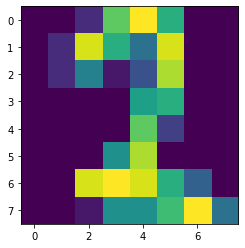

In [209]:
element=digits_sample.reshape((-1, 8, 8))[80] #le doy una nueva "forma" a la array para sacar un elemento y mostrarlo
plt.imshow(element)

In [210]:
normalized=norm(element,8) #Aqui normalizado el elemento

In [211]:
def accuracy():
    print(predict(normalized,zeroM)) #Este es para saber la presición que se tiene un elemento con el valor cero (base)
    print(predict(normalized,oneM))  #Este es para saber la presición que se tiene un elemento con el valor uno (base)

In [212]:
accuracy() #Exactitud de mi predición, el primero para el valor cero y el siguiente para el valor uno

0.609375
0.828125
